In [4]:
import pandas as pd

df = pd.read_csv("uae_used_cars_10k.csv", engine="python", on_bad_lines="skip")

def descriptive_stats(data, field):

    if field not in data.columns:
        return f"Error: '{field}' not found in dataset."

    if pd.api.types.is_numeric_dtype(data[field]):
        stats = data[field].describe()
        print(f"Descriptive Statistics for '{field}':\n")
        print(stats)
    else:
        print(f"'{field}' is not numeric. Showing category counts instead:\n")
        print(data[field].value_counts().head(10))

descriptive_stats(df, "Price")


Descriptive Statistics for 'Price':

count    5.566000e+03
mean     2.419675e+05
std      4.649310e+05
min      8.128000e+03
25%      4.973150e+04
50%      1.009435e+05
75%      2.251128e+05
max      1.290994e+07
Name: Price, dtype: float64


In [7]:
import pandas as pd

# FIX: make the CSV reader more tolerant and skip the broken line 5567
df = pd.read_csv(
    "uae_used_cars_10k.csv",
    engine="python",
    on_bad_lines="skip"   # ignores bad/corrupted rows instead of crashing
)

def descriptive_stats(data, field):

    if field not in data.columns:
        print(f"Error: '{field}' not found in dataset.")
        return

    if pd.api.types.is_numeric_dtype(data[field]):
        stats = data[field].describe()
        print(f"\nDescriptive Statistics for '{field}':\n")
        print(stats)
    else:
        print(f"\n'{field}' is not numeric. Showing category counts instead:\n")
        print(data[field].value_counts().head(10))

sample_df = df.sample(n=150, random_state=42)

dependent_var = "Price"
descriptive_stats(sample_df, dependent_var)



Descriptive Statistics for 'Price':

count    1.500000e+02
mean     2.293632e+05
std      4.222315e+05
min      1.280300e+04
25%      4.873250e+04
50%      8.787600e+04
75%      1.995238e+05
max      2.693217e+06
Name: Price, dtype: float64


In [9]:
import pandas as pd

# ✅ FIXED CSV READING LINE
df = pd.read_csv(
    "uae_used_cars_10k.csv",
    engine="python",        # more flexible parser
    on_bad_lines="skip"     # skip corrupted lines like row 5567
)

def descriptive_stats(data, field):

    if field not in data.columns:
        print(f"Error: '{field}' not found in dataset.")
        return

    if pd.api.types.is_numeric_dtype(data[field]):
        stats = data[field].describe()
        print(f"\nDescriptive Statistics for '{field}':\n")
        print(stats)
    else:
        print(f"\n'{field}' is not numeric. Showing category counts instead:\n")
        print(data[field].value_counts().head(10))

population_size = len(df)
sample_size = 150
k = population_size // sample_size

systematic_sample = df.iloc[::k]
systematic_sample = systematic_sample.head(sample_size)

print(f"Systematic sample created with step size = {k} and total {len(systematic_sample)} records.")

dependent_var = "Price"
descriptive_stats(systematic_sample, dependent_var)


Systematic sample created with step size = 37 and total 150 records.

Descriptive Statistics for 'Price':

count    1.500000e+02
mean     2.205367e+05
std      3.636848e+05
min      1.196800e+04
25%      5.427325e+04
50%      1.041885e+05
75%      2.095002e+05
max      2.943553e+06
Name: Price, dtype: float64


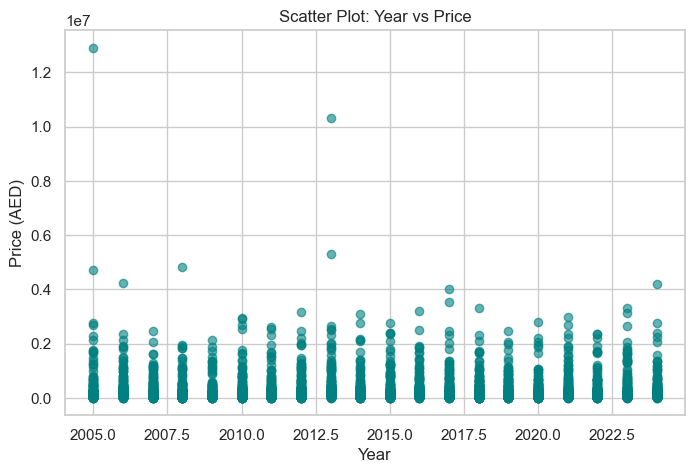

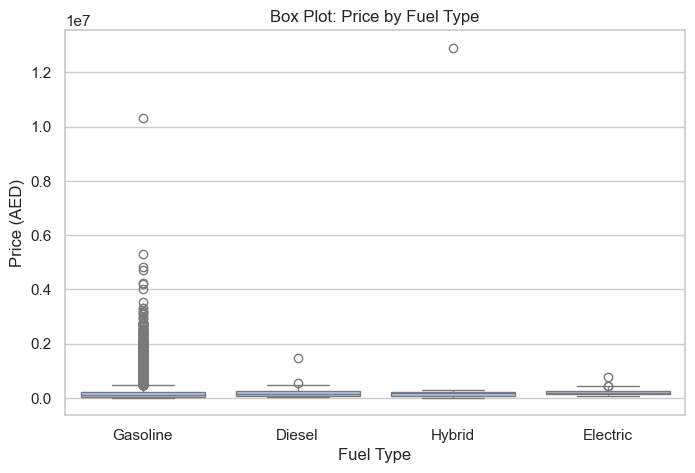

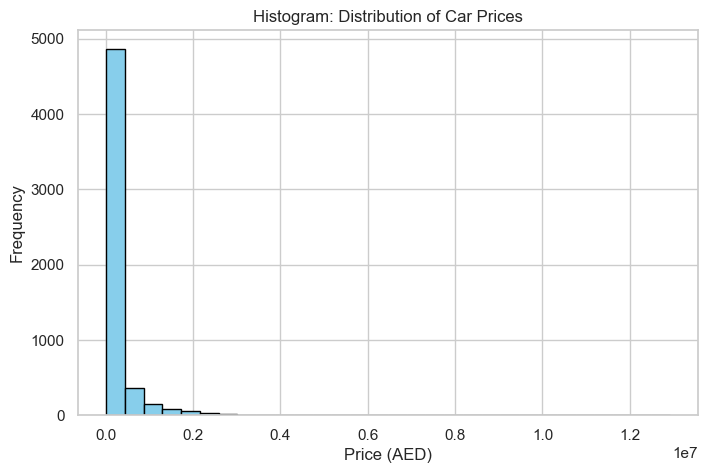

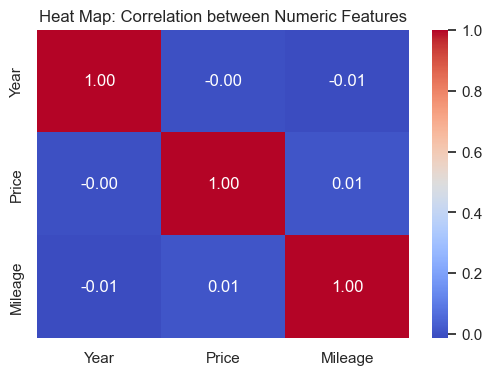

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("uae_used_cars_10k.csv", engine="python", on_bad_lines="skip")


sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))
plt.scatter(df["Year"], df["Price"], alpha=0.6, color='teal')
plt.title("Scatter Plot: Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price (AED)")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="Fuel Type", y="Price", data=df)
plt.title("Box Plot: Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price (AED)")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(df["Price"], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram: Distribution of Car Prices")
plt.xlabel("Price (AED)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
numeric_df = df.select_dtypes(include=["int64", "float64"])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heat Map: Correlation between Numeric Features")
plt.show()


In [11]:
import pandas as pd
from scipy import stats
import numpy as np

df = pd.read_csv("uae_used_cars_10k.csv", engine="python", on_bad_lines="skip")

num_df = df[["Price", "Mileage"]].dropna()

pearson_corr, pearson_p = stats.pearsonr(num_df["Price"], num_df["Mileage"])
spearman_corr, spearman_p = stats.spearmanr(num_df["Price"], num_df["Mileage"])

print("===== Numerical Correlation: Price vs Mileage =====")
print(f"Pearson Correlation: {pearson_corr:.3f}")
print(f"Pearson p-value: {pearson_p:.5f}")
print(f"Spearman Correlation: {spearman_corr:.3f}")
print(f"Spearman p-value: {spearman_p:.5f}")

df["Price_Category"] = pd.qcut(df["Price"], q=3, labels=["Low", "Medium", "High"])

contingency_table = pd.crosstab(df["Fuel Type"], df["Price_Category"])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("\n===== Categorical Correlation: Price vs Fuel Type =====")
print(f"Chi-square Statistic: {chi2:.3f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.5f}")

if p < 0.05:
    print("✓ Significant relationship between Fuel Type and Price.")
else:
    print("✗ No significant relationship between Fuel Type and Price.")


===== Numerical Correlation: Price vs Mileage =====
Pearson Correlation: 0.008
Pearson p-value: 0.54933
Spearman Correlation: 0.010
Spearman p-value: 0.47648

===== Categorical Correlation: Price vs Fuel Type =====
Chi-square Statistic: 38.834
Degrees of Freedom: 6
P-value: 0.00000
✓ Significant relationship between Fuel Type and Price.


In [12]:
import pandas as pd
from scipy import stats

df = pd.read_csv("uae_used_cars_10k.csv", engine="python", on_bad_lines="skip")

sample_df = df.sample(n=150, random_state=42)

dependent_var = "Price"

population_mean = df[dependent_var].mean()
sample_mean = sample_df[dependent_var].mean()

print(f"Population Mean (Price): {population_mean:.2f} AED")
print(f"Sample Mean (Price): {sample_mean:.2f} AED")

t_stat, p_value = stats.ttest_1samp(sample_df[dependent_var], population_mean)

print("\n===== One-Sample T-Test Result =====")
print(f"T-Statistic: {t_stat:.3f}")
print(f"P-Value: {p_value:.5f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (sample mean is significantly different).")
else:
    print("Fail to reject the null hypothesis (sample represents population).")


Population Mean (Price): 241967.54 AED
Sample Mean (Price): 229363.24 AED

===== One-Sample T-Test Result =====
T-Statistic: -0.366
P-Value: 0.71518
Fail to reject the null hypothesis (sample represents population).


R^2: -0.004
MAE: 222073.3
RMSE: 395355.2
Equation: Price = -1070815.56 + 653.67*Year


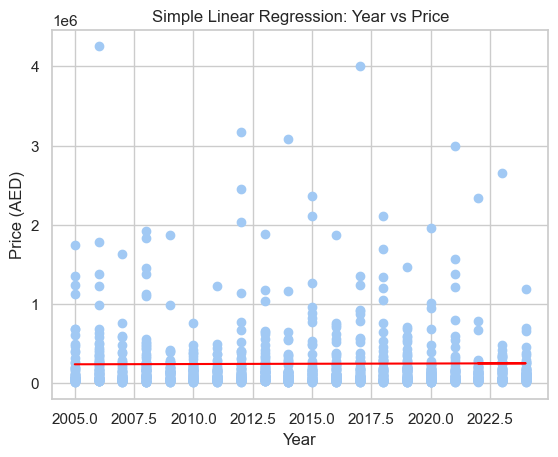

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_csv("uae_used_cars_10k.csv", engine="python", on_bad_lines="skip")

for col in ["Year", "Price", "Mileage", "Cylinders"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna(subset=["Year", "Price", "Mileage"])
df = df[df["Price"] > 0]

X = df[["Year"]].values
y = df["Price"].values

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=0)

lin = LinearRegression().fit(X_tr, y_tr)
y_hat = lin.predict(X_te)

print("R^2:", round(r2_score(y_te, y_hat), 3))
print("MAE:", round(mean_absolute_error(y_te, y_hat), 1))
print("RMSE:", round(np.sqrt(mean_squared_error(y_te, y_hat)), 1))
print("Equation: Price = {:.2f} + {:.2f}*Year".format(lin.intercept_, lin.coef_[0]))

plt.scatter(X_te, y_te)
plt.plot(X_te, y_hat, color='red')
plt.title("Simple Linear Regression: Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price (AED)")
plt.show()


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

feat_num = ["Year", "Mileage", "Cylinders"]
feat_cat = ["Transmission", "Fuel Type", "Make", "Body Type", "Location"]

X = df[feat_num + feat_cat].dropna()
y = df.loc[X.index, "Price"]

pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), feat_cat)
], remainder="passthrough")

mlr = Pipeline([("prep", pre), ("reg", LinearRegression())])

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=0)
mlr.fit(X_tr, y_tr)
pred = mlr.predict(X_te)

print("Multiple Linear Regression  R^2:", round(r2_score(y_te, pred), 3))
print("MAE:", round(mean_absolute_error(y_te, pred), 1))
print("RMSE:", round(np.sqrt(mean_squared_error(y_te, pred)), 1))


Multiple Linear Regression  R^2: 0.224
MAE: 214281.5
RMSE: 432944.1


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

q1, q2 = df["Price"].quantile([0.33, 0.66])

def to_cat(p):
    return "Low" if p <= q1 else ("Mid" if p <= q2 else "High")

df["PriceCat"] = df["Price"].apply(to_cat)

X = df[["Year", "Mileage", "Cylinders"]].dropna()
y = df.loc[X.index, "PriceCat"]

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

sc = StandardScaler()
X_tr_s = sc.fit_transform(X_tr)
X_te_s = sc.transform(X_te)

models = {
    "Logistic Regression": LogisticRegression(max_iter=400, random_state=0),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", max_depth=12, random_state=0)
}

preds = {}
for name, m in models.items():
    m.fit(X_tr_s, y_tr)
    yhat = m.predict(X_te_s)
    preds[name] = yhat
    print(f"\n===== {name} =====")
    print("Accuracy:", round(accuracy_score(y_te, yhat), 3))
    print("Confusion Matrix:\n", confusion_matrix(y_te, yhat))
    print(classification_report(y_te, yhat))

acc = {name: accuracy_score(y_te, yhat) for name, yhat in preds.items()}
best_name = max(acc, key=acc.get)
print("\nAccuracies:", {k: round(v, 3) for k, v in acc.items()})
print("Best classifier:", best_name, "with accuracy =", round(acc[best_name], 3))



===== Logistic Regression =====
Accuracy: 0.478
Confusion Matrix:
 [[271  89 101]
 [ 66 268 123]
 [133 203 116]]
              precision    recall  f1-score   support

        High       0.58      0.59      0.58       461
         Low       0.48      0.59      0.53       457
         Mid       0.34      0.26      0.29       452

    accuracy                           0.48      1370
   macro avg       0.47      0.48      0.47      1370
weighted avg       0.47      0.48      0.47      1370


===== KNN =====
Accuracy: 0.434
Confusion Matrix:
 [[250 111 100]
 [110 226 121]
 [157 177 118]]
              precision    recall  f1-score   support

        High       0.48      0.54      0.51       461
         Low       0.44      0.49      0.47       457
         Mid       0.35      0.26      0.30       452

    accuracy                           0.43      1370
   macro avg       0.42      0.43      0.43      1370
weighted avg       0.42      0.43      0.43      1370


===== Naive Bayes =====
A

In [16]:

best_model = {
    "Logistic Regression": models["Logistic Regression"],
    "KNN": models["KNN"],
    "Naive Bayes": models["Naive Bayes"],
    "Decision Tree": models["Decision Tree"]
}[best_name]

print("\nBest model predictions for first 5 test rows:")
print(best_model.predict(X_te_s[:5]))



Best model predictions for first 5 test rows:
['Low' 'Low' 'High' 'Mid' 'Low']


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


clust = df[["Year", "Mileage", "Cylinders", "Price"]].dropna().copy()


scaler = StandardScaler()
Z = scaler.fit_transform(clust)


wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, init="k-means++", random_state=0)
    km.fit(Z)
    wcss.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("k (number of clusters)")
plt.ylabel("WCSS")
plt.show()


kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0)
km_labels = kmeans.fit_predict(Z)

plt.figure(figsize=(6, 4))
plt.scatter(Z[km_labels == 0, 0], Z[km_labels == 0, 1], label="Cluster 1")
plt.scatter(Z[km_labels == 1, 0], Z[km_labels == 1, 1], label="Cluster 2")
plt.scatter(Z[km_labels == 2, 0], Z[km_labels == 2, 1], label="Cluster 3")


plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200, marker="X", color="black", label="Centroids")

plt.title("K-Means Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# ---------- Hierarchical Clustering (Dendrogram) ----------
plt.figure(figsize=(8, 4))
sch.dendrogram(sch.linkage(Z, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# ---------- Agglomerative Clustering ----------
hc = AgglomerativeClustering(n_clusters=3, linkage="ward")
hc_labels = hc.fit_predict(Z)

print("First 10 hierarchical cluster labels:", hc_labels[:10])
